<a href="https://colab.research.google.com/github/JamesKevinStar/ImplementacionesRedesNeuronales/blob/main/Red%20Neuronal%20BAM/Tarea_N%C2%B07_Implementaci%C3%B3n_Red_Neuronal_BAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementación de la Red Neuronal BAM
```
Docente     : Luis Beltran Palma Ttito
Alumnos     : James Kevin Estrella Vilca (182909) - Raísa Melina Peña Luque (182927)
Lugar       : Cusco, Perú, 2022
Universidad : Universidad Nacional de San Antonio Abad del Cusco
```

# 1. Importar Librerías

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import pandas as pd
import numpy as np
import statistics
import random
import pylab

from keras.utils.np_utils import to_categorical
from matplotlib import pylab

%matplotlib inline

# 2. Leer Datos

In [ ]:
data = pd.read_excel("Patrones_Vocales.xlsx")
data.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,A,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,1,1,-1,-1,-1,1
1,E,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,1,1,1
2,I,1,1,1,1,1,-1,-1,1,-1,...,-1,-1,1,-1,-1,1,1,1,1,1
3,O,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,1,1,1,1,1,1
4,U,1,-1,-1,-1,1,1,-1,-1,-1,...,1,-1,-1,-1,1,1,1,1,1,1


In [ ]:
test = pd.read_excel("Entradas_Vocales.xlsx")
test.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,A,1,1,-1,1,1,-1,-1,-1,-1,...,1,-1,-1,1,1,1,-1,-1,-1,1
1,E,-1,1,1,1,1,1,1,-1,-1,...,1,-1,1,1,-1,-1,1,1,1,1
2,I,-1,1,1,1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,1,1,1,-1,1
3,O,1,1,-1,1,1,1,-1,1,-1,...,1,1,-1,-1,1,-1,1,1,1,1
4,U,1,1,-1,-1,1,1,1,-1,1,...,1,-1,1,-1,1,1,1,1,1,1


In [ ]:
data_new = pd.read_excel("Vocales_Nuevas.xlsx")
data_new.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,A,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
1,E,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,-1,-1,-1,-1,-1,-1
2,I,1,1,1,1,-1,-1,-1,1,1,...,1,-1,-1,-1,1,1,1,1,-1,-1
3,O,-1,1,1,1,1,-1,1,1,1,...,1,1,1,1,-1,1,1,1,1,-1
4,U,-1,1,-1,-1,1,-1,-1,1,-1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
test_new = pd.read_excel("Entradas_Nuevas.xlsx")
test_new.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,A,-1,-1,-1,-1,-1,-1,1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
1,E,-1,-1,-1,-1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,-1,1,-1
2,I,1,-1,1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,1,1,1,1,-1
3,O,-1,1,-1,1,1,-1,1,1,1,...,1,1,-1,1,-1,-1,1,1,1,1
4,U,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,-1,1,1


# 3. Normalizar Datos

In [ ]:
def Categórico_Numérico(datos):
    datos = datos.astype("category")
    return datos.astype("category").cat.codes

In [ ]:
data.astype("category")
data['Vocal'] = Categórico_Numérico(data['Vocal'])
data.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,1,1,-1,-1,-1,1
1,1,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,-1,1,1,1,1,1
2,2,1,1,1,1,1,-1,-1,1,-1,...,-1,-1,1,-1,-1,1,1,1,1,1
3,3,1,1,1,1,1,1,-1,-1,-1,...,1,-1,-1,-1,1,1,1,1,1,1
4,4,1,-1,-1,-1,1,1,-1,-1,-1,...,1,-1,-1,-1,1,1,1,1,1,1


In [ ]:
test.astype("category")
test['Vocal'] = Categórico_Numérico(test['Vocal'])
test.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,25,26,27,28,29,30,31,32,33,34
0,0,1,1,-1,1,1,-1,-1,-1,-1,...,1,-1,-1,1,1,1,-1,-1,-1,1
1,1,-1,1,1,1,1,1,1,-1,-1,...,1,-1,1,1,-1,-1,1,1,1,1
2,2,-1,1,1,1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,1,1,1,-1,1
3,3,1,1,-1,1,1,1,-1,1,-1,...,1,1,-1,-1,1,-1,1,1,1,1
4,4,1,1,-1,-1,1,1,1,-1,1,...,1,-1,1,-1,1,1,1,1,1,1


In [ ]:
data_new.astype("category")
data_new['Vocal'] = Categórico_Numérico(data_new['Vocal'])
data_new.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,0,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,1,...,1,1,1,1,-1,-1,-1,-1,-1,-1
2,2,1,1,1,1,-1,-1,-1,1,1,...,1,-1,-1,-1,1,1,1,1,-1,-1
3,3,-1,1,1,1,1,-1,1,1,1,...,1,1,1,1,-1,1,1,1,1,-1
4,4,-1,1,-1,-1,1,-1,-1,1,-1,...,1,1,1,-1,-1,-1,-1,-1,-1,-1


In [ ]:
test_new.astype("category")
test_new['Vocal'] = Categórico_Numérico(test_new['Vocal'])
test_new.head()

,Vocal,0,1,2,3,4,5,6,7,8,...,50,51,52,53,54,55,56,57,58,59
0,0,-1,-1,-1,-1,-1,-1,1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
1,1,-1,-1,-1,-1,1,-1,-1,-1,1,...,1,1,-1,1,-1,-1,-1,-1,1,-1
2,2,1,-1,1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,1,1,1,1,-1
3,3,-1,1,-1,1,1,-1,1,1,1,...,1,1,-1,1,-1,-1,1,1,1,1
4,4,-1,1,-1,-1,-1,-1,-1,-1,-1,...,1,1,1,-1,-1,-1,-1,-1,1,1


# 4. Separar Datos

In [ ]:
def Separar_Datos(Data, Categoría):
    X = Data.drop([Categoría],axis=1).values
    Y = Data[Categoría].values
    return X, Y

In [ ]:
X, Y = Separar_Datos(data, "Vocal")
print(X)
print(Y)

[[ 1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 [ 1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
  -1  1 -1 -1 -1 -1  1  1  1  1  1]
 [ 1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
  -1 -1 -1  1 -1 -1  1  1  1  1  1]
 [ 1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1  1  1  1  1]
 [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1 -1 -1  1  1  1  1  1  1]]
[0 1 2 3 4]


In [ ]:
X_Test, Y_Test = Separar_Datos(test, "Vocal")
print(X_Test)
print(Y_Test)

[[ 1  1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1  1
  -1  1 -1 -1  1  1  1 -1 -1 -1  1]
 [-1  1  1  1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
  -1  1 -1  1  1 -1 -1  1  1  1  1]
 [-1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
  -1 -1 -1  1 -1 -1  1  1  1 -1  1]
 [ 1  1 -1  1  1  1 -1  1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1  1
  -1  1  1 -1 -1  1 -1  1  1  1  1]
 [ 1  1 -1 -1  1  1  1 -1  1  1  1 -1 -1  1  1  1 -1 -1 -1  1  1 -1 -1 -1
   1  1 -1  1 -1  1  1  1  1  1  1]]
[0 1 2 3 4]


In [ ]:
X_New, Y_New = Separar_Datos(data_new, "Vocal")
print(X_New)
print(Y_New)

[[-1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1
   1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1  1  1  1  1 -1 -1 -1 -1  1
   1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1]
 [-1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
  -1 -1  1  1  1 -1 -1 -1  1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1 -1 -1 -1
  -1 -1  1  1  1  1 -1 -1 -1 -1 -1 -1]
 [ 1  1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1  1  1 -1 -1 -1  1  1  1  1 -1 -1]
 [-1  1  1  1  1 -1  1  1  1  1  1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1
   1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1
   1  1  1  1  1  1 -1  1  1  1  1 -1]
 [-1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1
  -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1 -1  1 -1
  -1  1  1  1  1 -1 -1 -1 -1 -1 -1 -1]]
[0 1 2 3 4]


In [ ]:
X_Test_New, Y_Test_New = Separar_Datos(test_new, "Vocal")
print(X_Test_New)
print(Y_Test_New)

[[-1 -1 -1 -1 -1 -1  1 -1  1  1  1 -1 -1 -1 -1 -1  1 -1  1  1 -1  1  1 -1
   1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1  1 -1  1  1  1 -1  1 -1 -1 -1
   1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1]
 [-1 -1 -1 -1  1 -1 -1 -1  1  1  1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1 -1  1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1  1  1 -1  1 -1
  -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1]
 [ 1 -1  1  1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1  1 -1 -1
  -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1  1 -1 -1 -1
  -1  1 -1  1 -1 -1 -1  1  1  1  1 -1]
 [-1  1 -1  1  1 -1  1  1  1  1  1  1  1  1 -1 -1  1 -1  1  1 -1 -1 -1  1
   1 -1 -1 -1 -1  1  1 -1 -1 -1 -1  1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1  1
   1  1  1  1 -1  1 -1 -1  1  1  1  1]
 [-1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1  1 -1
  -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1  1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1
  -1  1  1  1  1 -1 -1 -1 -1 -1  1  1]]
[0 1 2 3 4]


# 5. Dar formato a la salida

In [ ]:
def Formato_Salidas(Y):
    Dif = len(set(Y))
    Clases = to_categorical(Y.tolist(), Dif)
    Clases_Dif = []
    for i in range(len(Clases)):
        if len(Clases_Dif) == 0:
            Clases_Dif.append(Clases[i].tolist())
        else:
            if Clases[i].tolist() not in Clases_Dif:
                Clases_Dif.append(Clases[i].tolist())
    for i in range(len(Clases_Dif)):
        for j in range(len(Clases_Dif[i])):
            if Clases_Dif[i][j] <= 0:
                Clases_Dif[i][j] = -1
            else:
                Clases_Dif[i][j] = 1
    return np.array(list(reversed(Clases_Dif)))

In [ ]:
Y = Formato_Salidas(Y)
print(Y)

[[-1 -1 -1 -1  1]
 [-1 -1 -1  1 -1]
 [-1 -1  1 -1 -1]
 [-1  1 -1 -1 -1]
 [ 1 -1 -1 -1 -1]]


In [ ]:
print(X@X.T)

[[35 19 -3 23 17]
 [19 35 13 19 13]
 [-3 13 35  5 -1]
 [23 19  5 35 29]
 [17 13 -1 29 35]]


In [ ]:
Y_New = Formato_Salidas(Y_New)
print(Y_New)

[[-1 -1 -1 -1  1]
 [-1 -1 -1  1 -1]
 [-1 -1  1 -1 -1]
 [-1  1 -1 -1 -1]
 [ 1 -1 -1 -1 -1]]


In [ ]:
print(X_New@X_New.T)

[[ 60   0  -8   4   4]
 [  0  60   8  -8   8]
 [ -8   8  60 -12  12]
 [  4  -8 -12  60 -12]
 [  4   8  12 -12  60]]


# 6. Implementación de la Red Neuronal Hopfield

## A. Función de Activación

In [ ]:
def Función_Activación(X):
    return 1 if X >= 0 else -1

## B. Entrenar Red Hopfield

In [ ]:
def Entrenar_Red_BAM(X, Y):
    S = [[0 for i in range(len(Y[0].tolist()))] for j in range(len(X[0]))]
    for i in range(len(X)):
        A = np.dot(np.transpose([X[i]]),[Y[i]])
        S = np.add(A,np.array(S))
    return S

## C. Mostrar y Reconocer Patrón

In [ ]:
def Reconocer_Patrón(W, A, Dimensión):
    while True:
        Comparación = A
        B = np.dot(A,W)
        for i in range(len(B)):
            B[i] = Función_Activación(B[i])
        A = np.dot(B,np.transpose(W))
        for i in range(len(A)):
            A[i] = Función_Activación(A[i])
        Matriz = np.reshape(A, Dimensión)
        plt.imshow(Matriz)
        plt.show()
        if np.array_equal(A, Comparación):
            return B

# 7. Verificar Funcionamiento de los Módulos con el ejemplo de la Diapositiva

In [ ]:
X1 = np.array([[1,-1,1,-1,1,-1],[1,1,1,-1,-1,-1]])
Y1 = np.array([[1,1,-1,-1],[1,-1,1,-1]])
S1 = Entrenar_Red_BAM(X1 ,Y1)
print(S1)

[[ 2  0  0 -2]
 [ 0 -2  2  0]
 [ 2  0  0 -2]
 [-2  0  0  2]
 [ 0  2 -2  0]
 [-2  0  0  2]]


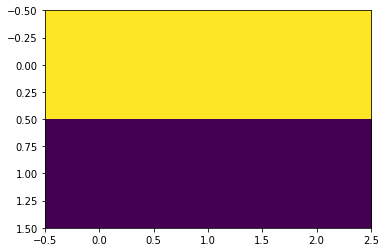

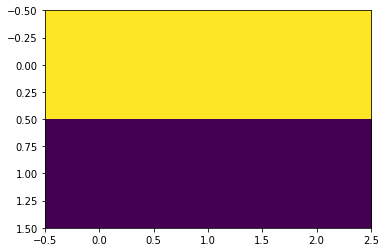

[ 1 -1  1 -1]


In [ ]:
N1 = np.array([1,1,-1,-1,-1,-1])
M1 = Reconocer_Patrón(S1, N1, (2,3))
print(M1)

# 8. Entrenamiento de la Red Neuronal BAM con los patrones proporcionados

## A. Entrenar Red Hopfield

In [ ]:
W = Entrenar_Red_BAM(X, Y)
print(W)

[[-3 -3 -3 -3 -3]
 [-5 -1 -1 -1 -1]
 [-5 -1 -1 -1 -1]
 [-5 -1 -1 -1 -1]
 [-3 -3 -3 -3 -3]
 [-1 -1 -5 -1 -1]
 [ 3  3  3  3  3]
 [ 1  1  5  1  1]
 [ 3  3  3  3  3]
 [ 1  1 -3 -3  1]
 [-1 -1 -5 -1 -1]
 [ 3  3  3  3  3]
 [ 1  1  5  1  1]
 [ 3  3  3  3  3]
 [ 1  1 -3 -3  1]
 [-1 -1 -5 -1 -1]
 [-1 -1 -1  3  3]
 [-3 -3  1  1  1]
 [-1 -1 -1  3  3]
 [ 1  1 -3 -3  1]
 [-1 -1 -5 -1 -1]
 [ 3  3  3  3  3]
 [ 1  1  5  1  1]
 [ 3  3  3  3  3]
 [ 1  1 -3 -3  1]
 [-1 -1 -5 -1 -1]
 [ 3  3  3  3  3]
 [ 1  1  5  1  1]
 [ 3  3  3  3  3]
 [ 1  1 -3 -3  1]
 [-3 -3 -3 -3 -3]
 [-1 -1 -1 -1 -5]
 [-1 -1 -1 -1 -5]
 [-1 -1 -1 -1 -5]
 [-3 -3 -3 -3 -3]]


## B. Reconocer el Patrón


 VOCAL A PREDECIR: A


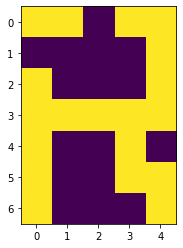

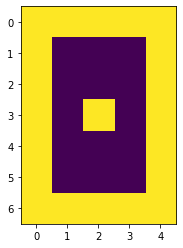

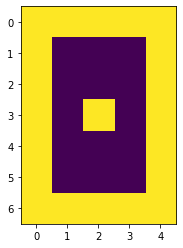

Salida : [-1 -1 -1 -1 -1]

 VOCAL A PREDECIR: E


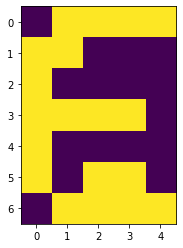

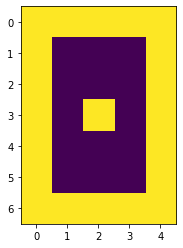

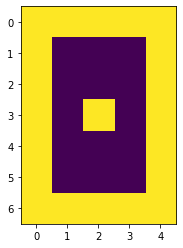

Salida : [-1 -1 -1 -1 -1]

 VOCAL A PREDECIR: I


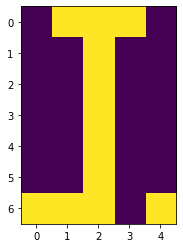

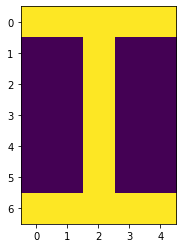

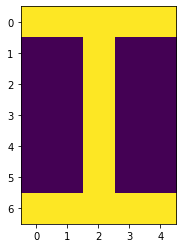

Salida : [-1 -1  1 -1 -1]

 VOCAL A PREDECIR: O


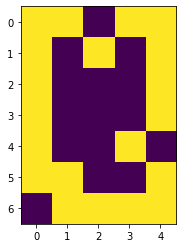

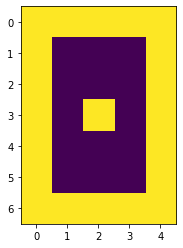

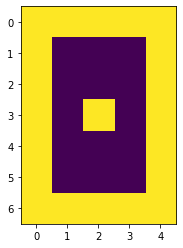

Salida : [-1 -1 -1 -1 -1]

 VOCAL A PREDECIR: U


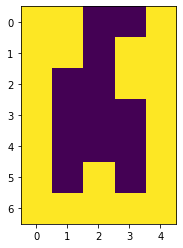

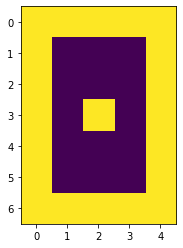

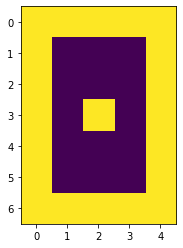

Salida : [-1 -1 -1 -1 -1]


In [ ]:
L = ["A","E","I","O","U"]
D = (7, 5)
for t in range(len(X_Test)):
    print("\n VOCAL A PREDECIR: {}".format(L[t]))
    Matriz = np.reshape(X_Test[t].tolist(),D)
    plt.imshow(Matriz)
    plt.show()
    print("=========================")
    M = Reconocer_Patrón(W, X_Test[t], D)
    print("Salida : {}".format(M))

# 9. Entrenamiento de la Red Neuronal BAM con patrones modificados

## A. Entrenar la Red Hopfield

In [ ]:
W_New = Entrenar_Red_BAM(X_New, Y_New)
print(W_New)

[[ 1  1  5  1  1]
 [ 1  1  1 -3 -3]
 [-1  3  3 -1 -1]
 [-1  3  3 -1 -1]
 [ 3  3 -1 -1 -1]
 [ 3  3  3  3  3]
 [ 1  5  1  1  1]
 [ 1  1  1 -3 -3]
 [-5 -1 -1 -1 -1]
 [-3  1 -3  1  1]
 [ 1  1 -3  1 -3]
 [-1  3 -1  3 -1]
 [ 1  5  1  1  1]
 [ 1 -3  1 -3  1]
 [-1 -1  3  3 -1]
 [ 3  3  3  3  3]
 [ 3 -1 -1 -1  3]
 [ 1  5  1  1  1]
 [ 1  5  1  1  1]
 [ 1 -3  1 -3  1]
 [-1 -1  3  3 -1]
 [ 3  3  3  3  3]
 [ 3 -1 -1 -1  3]
 [ 1  5  1  1  1]
 [-1  3 -1 -1  3]
 [ 3 -1  3 -1 -1]
 [-1 -1  3  3 -1]
 [ 1  1  1  5  1]
 [ 3 -1 -1  3 -1]
 [-1  3 -1 -1  3]
 [-1  3 -1 -1  3]
 [ 3 -1  3 -1 -1]
 [-1 -1  3  3 -1]
 [ 1  1  1  5  1]
 [ 3 -1 -1  3 -1]
 [-1  3 -1 -1  3]
 [-1  3 -1 -1  3]
 [ 1 -3  1 -3  1]
 [-3 -3  1  1  1]
 [ 1  1  1  1  5]
 [ 3 -1 -1 -1  3]
 [-1  3 -1 -1  3]
 [-1  3 -1 -1  3]
 [ 3 -1  3 -1 -1]
 [-1 -1  3  3 -1]
 [ 3  3  3  3  3]
 [ 5  1  1  1  1]
 [-1  3 -1 -1  3]
 [-1  3 -1 -1  3]
 [ 1  1  1 -3 -3]
 [-1 -1 -1 -1 -5]
 [ 1  1 -3  1 -3]
 [ 1  1 -3  1 -3]
 [-3  1 -3  1  1]
 [ 1  1  5  1  1]
 [-1  3  3

## B. Reconocer el Patrón


 VOCAL A PREDECIR: A


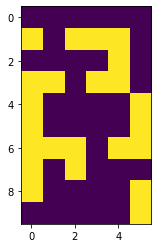

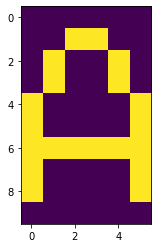

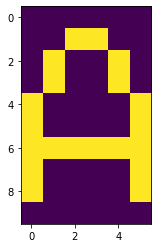

Salida : [-1 -1 -1 -1  1]

 VOCAL A PREDECIR: E


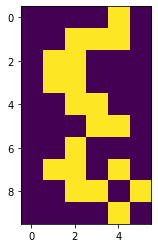

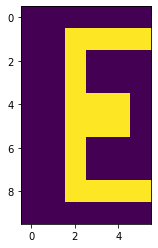

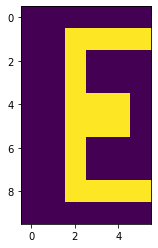

Salida : [-1 -1 -1  1 -1]

 VOCAL A PREDECIR: I


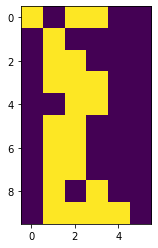

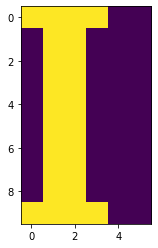

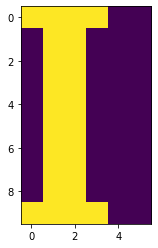

Salida : [-1 -1  1 -1 -1]

 VOCAL A PREDECIR: O


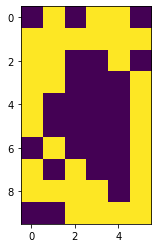

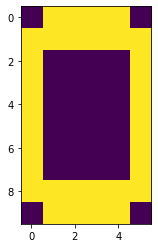

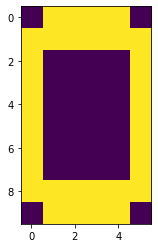

Salida : [-1  1 -1 -1 -1]

 VOCAL A PREDECIR: U


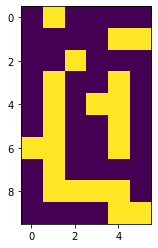

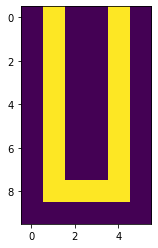

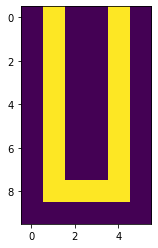

Salida : [ 1 -1 -1 -1 -1]


In [ ]:
D_New = (10,6)
for t in range(len(X_Test)):
    print("\n VOCAL A PREDECIR: {}".format(L[t]))
    Matriz = np.reshape(X_Test_New[t].tolist(),D_New)
    plt.imshow(Matriz)
    plt.show()
    print("=========================")
    M = Reconocer_Patrón(W_New, X_Test_New[t], D_New)
    print("Salida : {}".format(M))